# Case Study by: Mohammed Saqlain Attar 

## 1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


## 2. Find out the unique number of high level class.

In [4]:
df['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

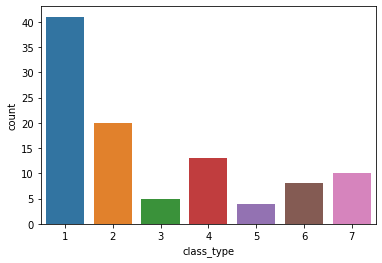

In [5]:
import seaborn as sns

sns.countplot(df['class_type'])

## 3. Use the 16-intermediate feature and perform an agglomerative clustering.[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

In [6]:
df.loc[:,'hair':'catsize'].shape

(101, 16)

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
agg = AgglomerativeClustering(n_clusters=7)

In [9]:
predicted_values = agg.fit_predict(df.loc[:,'hair':'catsize'])
predicted_values

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

In [10]:
np.unique(predicted_values)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

## 4. Compute the mean squared error by comparing the actual class and predicted high level class.


In [11]:
from sklearn import metrics

In [12]:
print(metrics.mean_squared_error(predicted_values, df["class_type"]))

7.673267326732673


In [13]:
abs_error = np.sqrt(metrics.mean_squared_error(predicted_values, df["class_type"]))
abs_error

2.7700663036708475

In [14]:
import numpy as np

In [15]:
X = np.array(df.loc[:,'hair':'catsize'])

In [16]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [17]:
X.shape

(101, 16)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [19]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [20]:
Z = linkage(X, 'ward')

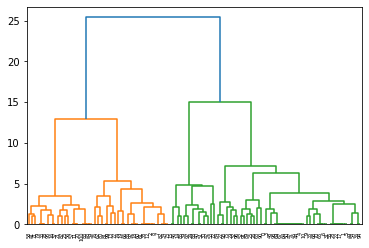

In [21]:
dn = dendrogram(Z)